In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import requests
import json
import numpy as np
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
ALPACA_API_KEY = ("PKZATSW3CIHFAQ2758XX")
ALPACA_SECRET_KEY = ("A6K8afibOfCPi5ZUp5i3rDs6VkmD4zUQphBYJKNR")

api = tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version = "v2"
)

In [3]:
# Set the ticker
ticker = "DIS"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2017-12-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-07", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.head()

DIS                                   
                             open    high       low   close   volume
2017-12-07 00:00:00-05:00  105.74  106.00  104.4900  105.29  6534555
2017-12-08 00:00:00-05:00  104.91  104.98  104.0775  104.23  5115228
2017-12-11 00:00:00-05:00  104.89  106.84  104.7900  106.81  5627987
2017-12-12 00:00:00-05:00  107.60  107.83  106.5850  107.40  5795523
2017-12-13 00:00:00-05:00  108.11  108.15  106.7100  107.61  8343282

In [4]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 5 years daily returns
MC_DIS = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*5)

In [5]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_DIS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.008876  1.021551  0.983029  1.001520  1.010742  0.970817  1.000232   
2     1.002164  1.006233  0.940407  0.990703  1.020577  0.979186  0.989610   
3     0.996556  1.019222  0.938267  1.005867  1.031836  0.992809  0.967014   
4     1.049120  0.995267  0.942958  1.037939  1.036498  0.990374  1.000206   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.800308  4.156717  0.987906  8.256169  3.273441  1.343703  1.341340   
1257  0.828521  3.963941  1.022610  8.299517  3.180289  1.372372  1.342449   
1258  0.831137  3.984718  1.004777  8.446735  3.194134  1.385529  1.328048   
1259  0.850702  4.118349  1.001903  8.511064  3.227065  1.394733  1.330136   
1260  0.874918  4.165877  1.019682  8.545762  3.232911  1.382119  1.267019   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.991528  0.988450  0.979586  ...  0.982111  1.037850  0.998512   
2     0.997810  1.013536  0.967261  ...  0.977817  1.040666  0.969301   
3     0.997763  1.027338  0.973529  ...  0.962384  1.049182  0.969987   
4     1.009996  1.033831  0.984221  ...  0.961172  1.070984  0.952629   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.809203  3.690267  3.466049  ...  1.386318  1.434086  4.991567   
1257  0.825474  3.577849  3.411935  ...  1.408771  1.481960  4.938514   
1258  0.827851  3.760742  3.389833  ...  1.417222  1.429649  4.948486   
1259  0.824936  3.724406  3.367727  ...  1.383588  1.474998  5.089566   
1260  0.812612  3.828335  3.306355  ...  1.425862  1.463895  5.053991   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.027579  0.980772  1.008058  1.024960  1.037989  0.980848  1.005486  
2     1.047995  0.987551  1.002196  1.044354  1.025760  0.984524  1.025239  
3     1.029154  0.995538  0.972746  1.068328  1.011706  0.974430  1.053105  
4     1.015602  1.005637  0.976383  1.077891  1.014500  0.975925  1.070871  
...        ...       ...       ...       ...       ...       ...       ...  
1256  7.555156  2.799109  0.910822  0.718704  4.768686  0.590099  2.315403  
1257  7.815331  2.822044  0.927120  0.715752  4.751428  0.588050  2.380035  
1258  7.745401  2.796424  0.926400  0.697760  4.805548  0.598265  2.346840  
1259  7.738015  2.761683  0.917890  0.710800  4.780554  0.596212  2.379434  
1260  7.616705  2.818338  0.906475  0.715955  4.721302  0.608056  2.409219  

[1261 rows x 500 columns]

In [6]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_DIS.simulated_return.mean(axis=1)),
    "median": list(MC_DIS.simulated_return.median(axis=1)),
    "min": list(MC_DIS.simulated_return.min(axis=1)),
    "max": list(MC_DIS.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.001036  1.001548  0.923095  1.063742
2  1.000326  1.000356  0.915090  1.098568
3  0.999555  0.998064  0.896261  1.115245
4  1.001987  1.000487  0.891452  1.118926

In [8]:
 # Use the `plot` function to visually analyze the trajectory of DIS stock daily returns on the next 5 years of trading days simulation
dis_monte_carlo_plot = df_simulated_returns.hvplot(title="Simulated Daily Returns Behavior of DIS Stock Over the Next Year")
dis_monte_carlo_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [9]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_DIS.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.826074
std               2.463936
min               0.424450
25%               1.333783
50%               2.105412
75%               3.358181
max              22.184955
95% CI Lower      0.605206
95% CI Upper      9.441744
Name: 1260, dtype: float64


In [10]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $6052.06 and $94417.44.


In [11]:
# API request
fmp_api_key = os.getenv("FMP_API_KEY")
dis_ratios = requests.get('https://fmpcloud.io/api/v3/ratios/DIS?limit=40&apikey=75b433d858eb85c8d7ec02d7f47df327').json()
dis_balance_sheet = requests.get('https://fmpcloud.io/api/v3/balance-sheet-statement/DIS?limit=120&apikey=75b433d858eb85c8d7ec02d7f47df327').json()
dis_ratios_df = pd.DataFrame(dis_ratios)
dis_ratios_df = dis_ratios_df.drop([3], axis = 0)
dis_balance_sheet_df = pd.DataFrame(dis_balance_sheet)
disney_current_ratio = {}
disney_debt_to_assets = {}
debt_to_equity = {}
gross_profit = {}
return_on_equity = {}
price_to_sales = {}
price_to_earnings_ratio = {}
price_to_book_ratio = {}
net_profit_margin = {}
dis_ratio = {}


In [12]:
# Disney Financial reports
disney = []
for item in dis_ratios:
    disney.append(item['symbol'])

In [13]:
# Current Ratios for last 4 years
ratio_20 = dis_ratios[0]['currentRatio'] 
ratio_19 = dis_ratios[1]['currentRatio'] 
ratio_18 = dis_ratios[2]['currentRatio'] 
ratio_17 = dis_ratios[4]['currentRatio'] 

In [14]:
# Debt to Assests for last 5 years
debt_to_assets_20 = dis_balance_sheet[0]['totalDebt'] / dis_balance_sheet[0]['totalAssets'] 
debt_to_assets_19 = dis_balance_sheet[1]['totalDebt'] / dis_balance_sheet[1]['totalAssets'] 
debt_to_assets_18 = dis_balance_sheet[2]['totalDebt'] / dis_balance_sheet[2]['totalAssets'] 
debt_to_assets_17 = dis_balance_sheet[3]['totalDebt'] / dis_balance_sheet[3]['totalAssets'] 
debt_to_assets_16 = dis_balance_sheet[4]['totalDebt'] / dis_balance_sheet[4]['totalAssets']

In [15]:
# Debt to Equity for last 4 years
debt_to_equity_20 = dis_ratios[0]['debtEquityRatio'] 
debt_to_equity_19 = dis_ratios[1]['debtEquityRatio'] 
debt_to_equity_18 = dis_ratios[2]['debtEquityRatio'] 
debt_to_equity_17 = dis_ratios[4]['debtEquityRatio'] 


In [16]:
# Disney Gross Profit margins for last 4 years
gross_profit_20 = dis_ratios[0]['grossProfitMargin']
gross_profit_19 = dis_ratios[1]['grossProfitMargin']
gross_profit_18 = dis_ratios[2]['grossProfitMargin']
gross_profit_17 = dis_ratios[4]['grossProfitMargin']

In [17]:
# Disney Return on Equity for the last 4 years
return_on_equity_20 = dis_ratios[0]['returnOnEquity']
return_on_equity_19 = dis_ratios[1]['returnOnEquity']
return_on_equity_18 = dis_ratios[2]['returnOnEquity']
return_on_equity_17 = dis_ratios[4]['returnOnEquity']

In [18]:
# Disney Price to Sales ratio for last 4 years
price_to_sales_20 = dis_ratios[0]['priceToSalesRatio']
price_to_sales_19 = dis_ratios[1]['priceToSalesRatio']
price_to_sales_18 = dis_ratios[2]['priceToSalesRatio']
price_to_sales_17 = dis_ratios[4]['priceToSalesRatio']

In [19]:
# Disney Price to Earnings ratio for last 4 years
price_to_earnings_ratio_20 = dis_ratios[0]['priceEarningsRatio']
price_to_earnings_ratio_19 = dis_ratios[1]['priceEarningsRatio']
price_to_earnings_ratio_18 = dis_ratios[2]['priceEarningsRatio']
price_to_earnings_ratio_17 = dis_ratios[4]['priceEarningsRatio']


In [20]:
# Disney Price to Book ratio for last 4 years
price_to_book_ratio_20 = dis_ratios[0]['priceToBookRatio']
price_to_book_ratio_19 = dis_ratios[1]['priceToBookRatio']
price_to_book_ratio_18 = dis_ratios[2]['priceToBookRatio']
price_to_book_ratio_17 = dis_ratios[4]['priceToBookRatio']


In [21]:
# Disney Net Profit Margin for the last 4 years
net_profit_margin_20 = dis_ratios[0]['netProfitMargin']
net_profit_margin_19 = dis_ratios[1]['netProfitMargin']
net_profit_margin_18 = dis_ratios[2]['netProfitMargin']
net_profit_margin_17 = dis_ratios[4]['netProfitMargin']

In [22]:
# Dictonary for Current Ratios
disney_current_ratio['DIS']= {}
disney_current_ratio ['DIS']['2020'] = ratio_20
disney_current_ratio['DIS']['2019'] = ratio_19
disney_current_ratio ['DIS']['2018'] = ratio_18
disney_current_ratio['DIS']['2017'] = ratio_17
disney_current_ratio_df = pd.DataFrame.from_dict(disney_current_ratio, orient = 'index')
disney_current_ratio_df.hvplot.bar(xlabel = 'year', ylabel = 'disney_current_ratio')

:Bars   [index,Variable]   (value)

In [23]:
# Dictonary for Debt to Assest
disney_debt_to_assets['DIS'] = {}
disney_debt_to_assets ['DIS']['2020'] = debt_to_assets_20
disney_debt_to_assets ['DIS']['2019'] = debt_to_assets_19
disney_debt_to_assets ['DIS']['2018'] = debt_to_assets_18
disney_debt_to_assets ['DIS']['2017'] = debt_to_assets_17
disney_debt_to_assets ['DIS']['2016'] = debt_to_assets_16
disney_debt_to_assets_df = pd.DataFrame.from_dict(disney_debt_to_assets, orient = 'index')
disney_debt_to_assets_df.hvplot.bar(xlabel = 'year', ylabel = 'disney_debt_to_assets')


:Bars   [index,Variable]   (value)

In [24]:
# Dictonary for Debt to Equity
debt_to_equity ['DIS'] = {}
debt_to_equity ['DIS']['2020'] = debt_to_equity_20
debt_to_equity ['DIS']['2019'] = debt_to_equity_19
debt_to_equity ['DIS']['2018'] = debt_to_equity_18
debt_to_equity ['DIS']['2017'] = debt_to_equity_17
debt_to_equity_df = pd.DataFrame.from_dict(debt_to_equity, orient = 'index')
debt_to_equity_df.hvplot.bar(xlabel = 'year', ylabel = 'debt_to_equity')

:Bars   [index,Variable]   (value)

In [25]:
# Dictonary for Gross Profits
gross_profit['DIS'] = {}
gross_profit['DIS']['2020'] = gross_profit_20
gross_profit['DIS']['2019'] = gross_profit_19
gross_profit['DIS']['2018'] = gross_profit_18
gross_profit['DIS']['2017'] = gross_profit_17
gross_profit_df = pd.DataFrame.from_dict(gross_profit, orient = 'index')
gross_profit_df.hvplot.bar(xlabel = 'year', ylabel = 'gross_profit')

:Bars   [index,Variable]   (value)

In [26]:
# Dictonary for Return on Equity
return_on_equity ['DIS'] = {}
return_on_equity ['DIS']['2020'] = return_on_equity_20
return_on_equity ['DIS']['2019'] = return_on_equity_19
return_on_equity ['DIS']['2018'] = return_on_equity_18
return_on_equity ['DIS']['2017'] = return_on_equity_17
return_on_equity_df = pd.DataFrame.from_dict(return_on_equity, orient = 'index')
return_on_equity_df.hvplot.bar(xlabel = 'year', ylabel = 'return_on_equity')

:Bars   [index,Variable]   (value)

In [27]:
# Dictonary for Price to Sales
price_to_sales ['DIS'] = {}
price_to_sales ['DIS']['2020'] = price_to_sales_20
price_to_sales ['DIS']['2019'] = price_to_sales_19
price_to_sales ['DIS']['2018'] = price_to_sales_18
price_to_sales ['DIS']['2017'] = price_to_sales_17
price_to_sales_df = pd.DataFrame.from_dict(price_to_sales, orient = 'index')
price_to_sales_df.hvplot.bar(xlabel = 'year', ylabel = 'price_to_sales')

:Bars   [index,Variable]   (value)

In [28]:
# Dictonary for Price to Earnings Ratio
price_to_earnings_ratio ['DIS'] = {}
price_to_earnings_ratio ['DIS']['2020'] = price_to_earnings_ratio_20
price_to_earnings_ratio ['DIS']['2019'] = price_to_earnings_ratio_19
price_to_earnings_ratio ['DIS']['2018'] = price_to_earnings_ratio_18
price_to_earnings_ratio ['DIS']['2017'] = price_to_earnings_ratio_17 
price_to_earnings_ratio_df = pd.DataFrame.from_dict(price_to_earnings_ratio, orient = 'index')
price_to_earnings_ratio_df.hvplot.bar(xlabel = 'year', ylabel = 'price_to_earnings_ratio')

:Bars   [index,Variable]   (value)

In [29]:
# Dictonary for Price to Book Ratio
price_to_book_ratio['DIS'] = {}
price_to_book_ratio['DIS']['2020'] = price_to_book_ratio_20
price_to_book_ratio['DIS']['2019'] = price_to_book_ratio_19
price_to_book_ratio['DIS']['2018'] = price_to_book_ratio_18
price_to_book_ratio['DIS']['2017'] = price_to_book_ratio_17
price_to_book_ratio_df = pd.DataFrame.from_dict(price_to_book_ratio, orient = 'index')
price_to_book_ratio_df.hvplot.bar(xlabel = 'year', ylabel = 'price_to_book_ratio')

:Bars   [index,Variable]   (value)

In [30]:
# Dictonary for Net Profit Margin
net_profit_margin['DIS'] = {}
net_profit_margin['DIS']['2020'] = net_profit_margin_20
net_profit_margin['DIS']['2019'] = net_profit_margin_19
net_profit_margin['DIS']['2018'] = net_profit_margin_18
net_profit_margin['DIS']['2017'] = net_profit_margin_17
net_profit_margin_df = pd.DataFrame.from_dict(net_profit_margin, orient = 'index')
net_profit_margin_df.hvplot.bar(xlabel = 'Year', ylabel = 'net_profit_margin')

:Bars   [index,Variable]   (value)

In [31]:
# Define Panel Visualization Functions


def dis_current_ratio():
    current_ratios = dis_ratios_df["currentRatio"].groupby([dis_ratios_df.date]).mean()
    current_ratio_figure = plt.figure()
    current_ratio_plot = (current_ratios.plot.line(x='Date', y='Current Ratio', title="Current Ratio Disney "))
    plt.close(current_ratio_figure)
    return pn.pane.Matplotlib(current_ratio_figure)


def dis_debt_equity_ratio():
    debt_equity_ratios = dis_ratios_df["debtEquityRatio"].groupby([dis_ratios_df.date]).mean()
    debt_equity_ratios_figure = plt.figure()
    debt_equity_ratio_plot = (debt_equity_ratios.plot.line(x='Date', y='Debt Equity Ratio', title="Debt Equity Ratio Disney "))
    plt.close(debt_equity_ratios_figure)
    return pn.pane.Matplotlib(debt_equity_ratios_figure)


def dis_gross_profit_margin():
    gross_profit_margin = dis_ratios_df["grossProfitMargin"].groupby([dis_ratios_df.date]).mean()
    gross_profit_margin_figure = plt.figure()
    gross_profit_margin_plot = (gross_profit_margin.plot.line(x='Date', y='Gross Profit Ratio', title="Gross Profit Ratio Disney "))
    plt.close(gross_profit_margin_figure)
    return pn.pane.Matplotlib(gross_profit_margin_figure)

def dis_return_on_equity():
    return_on_equity = dis_ratios_df["returnOnEquity"].groupby([dis_ratios_df.date]).mean()
    return_on_equity_figure = plt.figure()
    return_on_equity_plot = (return_on_equity.plot.line(x='Date', y='Return On Equity Ratio', title="Return On Equity Ratio Disney "))
    plt.close(return_on_equity_figure)
    return pn.pane.Matplotlib(return_on_equity_figure)

def dis_price_to_sales_ratio():
    price_to_sales = dis_ratios_df["priceToSalesRatio"].groupby([dis_ratios_df.date]).mean()
    price_to_sales_figure = plt.figure()
    price_to_sales_plot = (price_to_sales.plot.line(x='Date', y='Price To Sales Ratio', title="Price To Sales Ratio Disney "))
    plt.close(price_to_sales_figure)
    return pn.pane.Matplotlib(price_to_sales_figure)


def dis_price_earnings_ratio():
    price_earnings_ratio = dis_ratios_df["priceEarningsRatio"].groupby([dis_ratios_df.date]).mean()
    price_earnings_ratio_figure = plt.figure()
    price_earnings_ratio_plot = (price_earnings_ratio.plot.line(x='Date', y='Price Earnings Ratio', title="Price Earnings Ratio Disney "))
    plt.close(price_earnings_ratio_figure)
    return pn.pane.Matplotlib(price_earnings_ratio_figure)

def dis_price_to_book_ratio():
    price_to_book = dis_ratios_df["priceToBookRatio"].groupby([dis_ratios_df.date]).mean()
    price_to_book_figure = plt.figure()
    price_to_book_plot = (price_to_book.plot.line(x='Date', y='Price To Book Ratio', title="Price To Book Ratio Disney "))
    plt.close(price_to_book_figure)
    return pn.pane.Matplotlib(price_to_book_figure)

def dis_net_profit_margin():
    net_profit_margin = dis_ratios_df["netProfitMargin"].groupby([dis_ratios_df.date]).mean()
    net_profit_margin_figure = plt.figure()
    net_profit_margin_plot = (net_profit_margin.plot.line(x='Date', y='Net Profit Margin', title="Net Profit Margin Disney "))
    plt.close(net_profit_margin_figure)
    return pn.pane.Matplotlib(net_profit_margin_figure)

def dis_debt_to_assets():
    total_debt = dis_balance_sheet_df["totalDebt"].groupby([dis_balance_sheet_df.date]).mean()
    total_assest = dis_balance_sheet_df["totalAssets"].groupby([dis_balance_sheet_df.date]).mean()
    debt_to_assets = total_debt/total_assest
    debt_to_assets_figure = plt.figure()
    debt_to_assets_plot = (debt_to_assets.plot.line(x='Date', y='Debt To Assets', title="Debt To Assets Disney "))
    plt.close(debt_to_assets_figure)
    return pn.pane.Matplotlib(debt_to_assets_figure)




In [34]:
# Create a Title for the Dashboard
title = "Disney Compnay Analysis"

# Creating Tabs for Dashboard
welcome = pn.Row(pn.Column(title))

disney_ratios = pn.Column(dis_current_ratio(), dis_debt_to_assets(), dis_debt_equity_ratio(),dis_gross_profit_margin(), dis_return_on_equity(), dis_price_to_sales_ratio(), dis_price_earnings_ratio(), dis_price_to_book_ratio(), dis_net_profit_margin())
monte_carlo_analysis = pn.Row(dis_monte_carlo_plot)
disney_analysis = pn.Tabs(("Welcome", welcome), ("Market Analysis", disney_ratios), ("Monte Carlo", monte_carlo_analysis) )



Tabs
    [0] Row
        [0] Column
            [0] Markdown(str)
    [1] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
        [4] Matplotlib(Figure)
        [5] Matplotlib(Figure)
        [6] Matplotlib(Figure)
        [7] Matplotlib(Figure)
        [8] Matplotlib(Figure)
    [2] Row
        [0] HoloViews(NdOverlay)
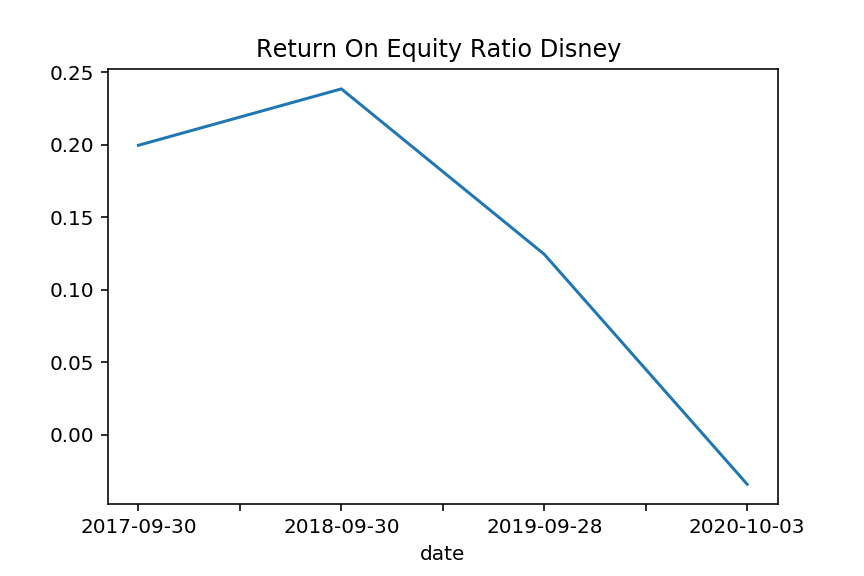
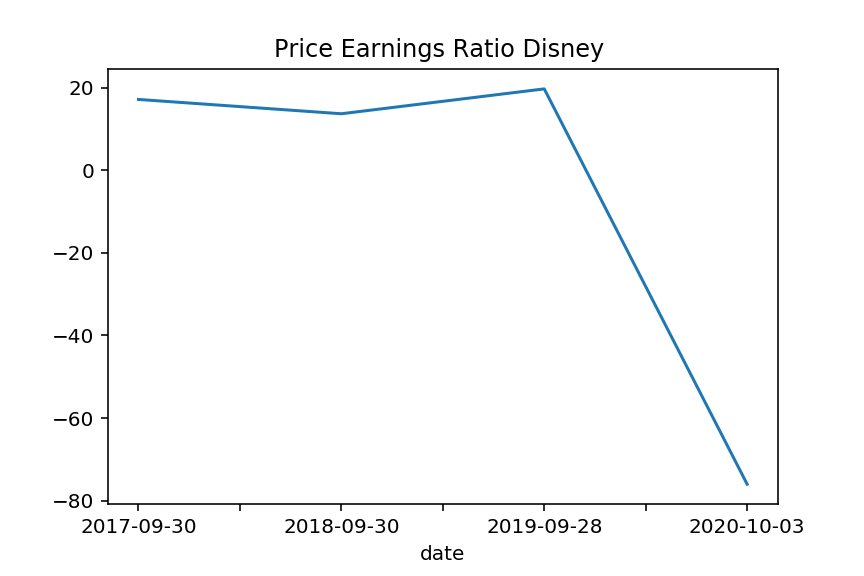
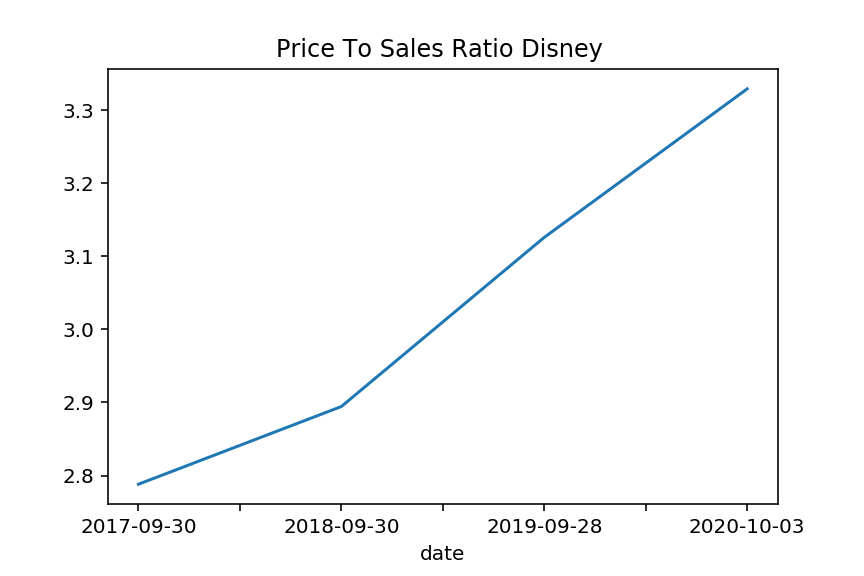
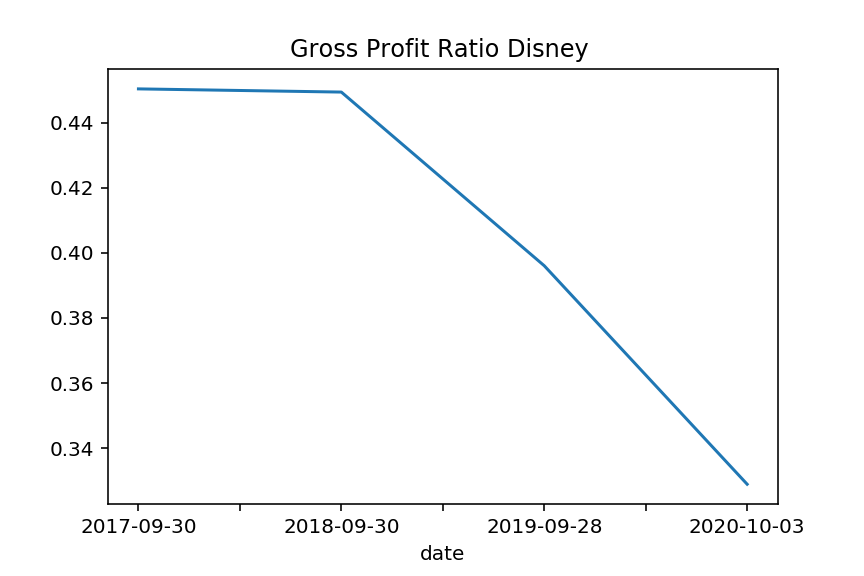
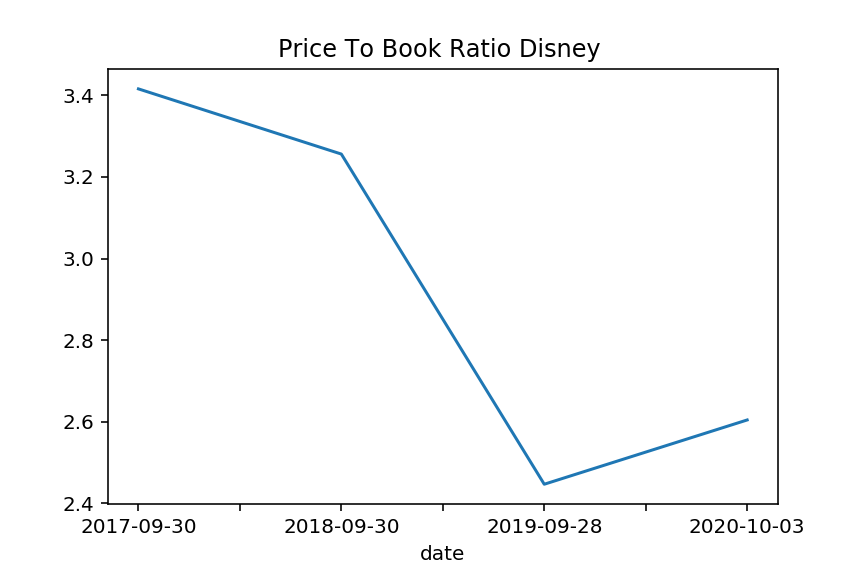
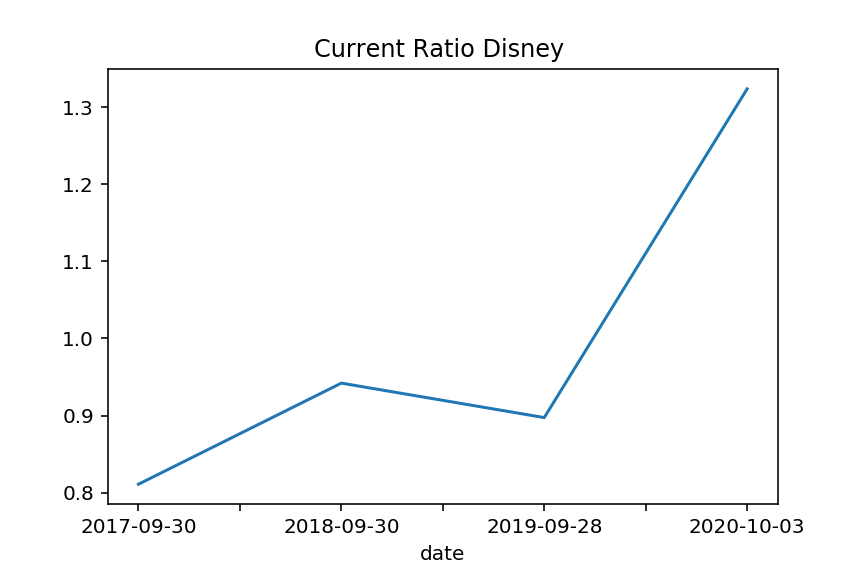

In [35]:
disney_analysis.servable()